In [57]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [58]:
mode = "cluster_results"

# Sensitivity Analysis: Model-Based

In [59]:
def format_percentage(data):
    tmp = data.copy()
    for k in tmp:
        tmp[k] = round(abs(tmp[k]) * 100.0, 2)
    return tmp

def format_time(data):
    tmp = data.copy()
    for k in tmp:
        tmp[k] = round(abs(tmp[k]) * 1e-9, 2)
    return tmp    
    
def load_results(dir_, subdir_error, compared_objects): 
    results = {}
    for k in compared_objects:
        error_file_name = "relative_error_{}.json".format(k)
        time_file_name = "response_time_{}.json".format(k)

        with open(dir_ + subdir_error + error_file_name) as infile:
            relative_error = json.load(infile)

        with open(dir_ + subdir_time + time_file_name) as infile:
            response_time = json.load(infile)

        res = {"error": format_percentage(relative_error), "time": format_time(response_time)}

        results[k] = res
        
    return results

In [60]:
def plot_bar(results, results_type="error", figsize=(10, 6), bar_width=0.2):
    fig, ax = plt.subplots(figsize=figsize)
    compared_obj = list(results.keys())
    get_results = lambda x: results[x][results_type]
    _X = np.arange(len(get_results(compared_obj[0])))
    
    bar_number = len(compared_obj)
    big_bar_length = (bar_number * bar_width)
    
    for idx, obj in enumerate(compared_obj):
        ax.bar(_X - (big_bar_length - bar_width) / 2 + idx * bar_width, get_results(obj).values(), bar_width)

    plt.xticks(_X, get_results(compared_obj[0]).keys())
    return fig, ax

# Influence of sample size

In [61]:
compared_objects = [0.001, 0.01, 0.1,0.5, 1.0]
root = "../../../"
dir_name = "results/{}/sensitive_analysis/sample_size/model_based/".format(mode)
dir_ = root + dir_name 
subdir_error = "relative_error/"
subdir_time = "response_time/"
    
model_based_results = load_results(dir_, subdir_error, compared_objects)

In [62]:
model_based_results

{0.001: {'error': {'count': 2.06, 'avg': 7.59, 'sum': 9.23},
  'time': {'count': 0.03, 'avg': 0.07, 'sum': 0.08}},
 0.01: {'error': {'count': 2.12, 'avg': 7.59, 'sum': 9.5},
  'time': {'count': 0.0, 'avg': 0.07, 'sum': 0.06}},
 0.1: {'error': {'count': 2.05, 'avg': 7.58, 'sum': 9.58},
  'time': {'count': 0.0, 'avg': 0.06, 'sum': 0.07}},
 0.5: {'error': {'count': 2.05, 'avg': 7.59, 'sum': 9.59},
  'time': {'count': 0.0, 'avg': 0.06, 'sum': 0.06}},
 1.0: {'error': {'count': 2.04, 'avg': 7.59, 'sum': 9.63},
  'time': {'count': 0.0, 'avg': 0.06, 'sum': 0.06}}}

In [63]:
plot_legend = list(map(lambda x: str(x * 100) + "% sample size", compared_objects))

## On Relative Error

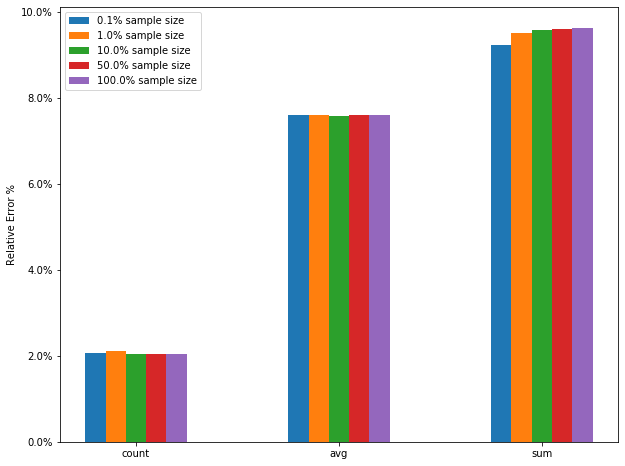

In [64]:
fig, ax = plot_bar(model_based_results, figsize=(10, 8), bar_width=0.1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Relative Error %')
ax.legend(plot_legend, loc='upper left')
plt.show()

## On Response Time

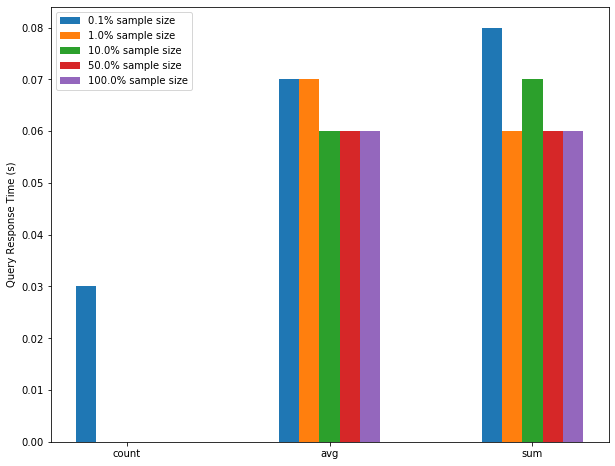

In [65]:
fig, ax = plot_bar(model_based_results, "time", figsize=(10, 8), bar_width=0.1)
ax.set_ylabel('Query Response Time (s)')
ax.legend(plot_legend, loc='upper left')
plt.show()

# Sensitivity Analysis: Sample-Based VS Model-Based

In [66]:
compared_objects = [0.001, 0.01, 0.1,0.5, 1.0]
root = "../../../"
dir_name = "results/{}/sensitive_analysis/sample_size/model_based/".format(mode)
dir_ = root + dir_name 
subdir_error = "relative_error/"
subdir_time = "response_time/"
    
model_based_results = load_results(dir_, subdir_error, compared_objects)

dir_name = "results/{}/sensitive_analysis/sample_size/sample_based/".format(mode)
dir_ = root + dir_name 
subdir_error = "relative_error/"
subdir_time = "response_time/"
    
sample_based_results = load_results(dir_, subdir_error, compared_objects)

In [67]:
def plot_sample_vs_model_methods(model_based_results, sample_based_results, results_type="error", figsize=(10, 6), bar_width=0.1):
    fig, ax = plt.subplots(figsize=figsize)
    compared_obj = list(model_based_results.keys())
    get_model_results = lambda x: model_based_results[x][results_type]
    get_sample_results = lambda x: sample_based_results[x][results_type]
    _X = np.arange(2)

    bar_number = len(compared_obj)
    big_bar_length = (bar_number * bar_width)

    for idx, obj in enumerate(compared_obj):
        model_based_average = sum(get_model_results(obj).values()) / len(get_model_results(obj).values())
        sample_based_average = sum(get_sample_results(obj).values()) / len(get_sample_results(obj).values())

        ax.bar(_X - (big_bar_length - bar_width) / 2 + idx * bar_width, [model_based_average, sample_based_average], bar_width)

    plt.xticks(_X, ["Model Based", "Sample Based"])
    return fig, ax

## Relative Error

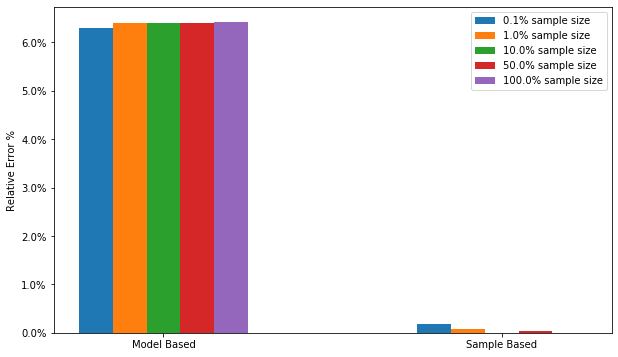

In [68]:
fig, ax = plot_sample_vs_model_methods(model_based_results, sample_based_results)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Relative Error %')
plot_legend = list(map(lambda x: str(x * 100) + "% sample size", compared_objects))
ax.legend(plot_legend, loc='upper right')
plt.show()

## Response Time

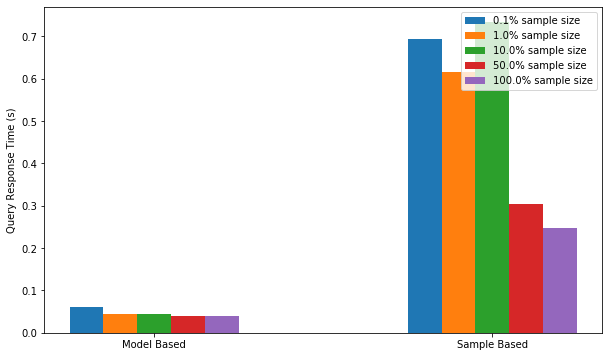

In [69]:
fig, ax = plot_sample_vs_model_methods(model_based_results, sample_based_results, results_type='time')
ax.set_ylabel('Query Response Time (s)')
ax.legend(plot_legend, loc='upper right')
plt.show()

# Influence of Query Range

In [70]:
compared_objects = [0.001, 0.01, 0.1,0.5, 1.0]
root = "../../../"
dir_name = "results/{}/sensitive_analysis/query_range/".format(mode)
dir_ = root + dir_name 
subdir_error = "relative_error/"
subdir_time = "response_time/"

query_range_results = load_results(dir_, subdir_error, compared_objects)

In [71]:
plot_legend = list(map(lambda x: str(x * 100) + "% query range", compared_objects))

## On Relative Error

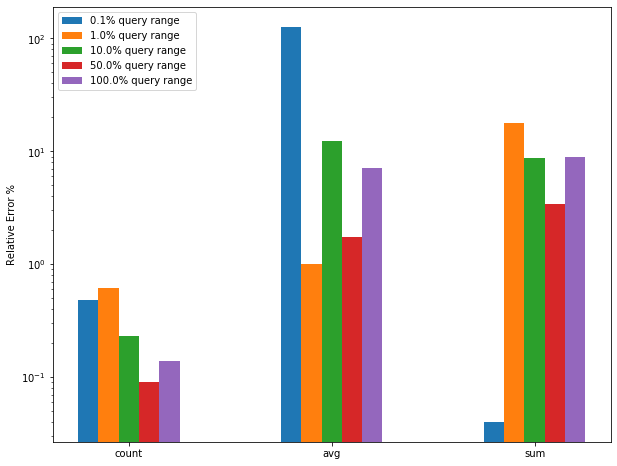

In [75]:
fig, ax = plot_bar(query_range_results, figsize=(10, 8), bar_width=0.1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_yscale("log")
ax.set_ylabel('Relative Error %')
ax.legend(plot_legend, loc='upper left')
plt.show()

## On Response Time

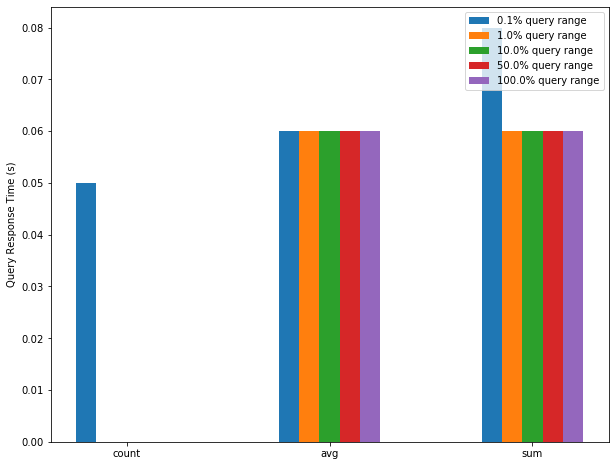

In [73]:
fig, ax = plot_bar(query_range_results, "time", figsize=(10, 8), bar_width=0.1)
ax.set_ylabel('Query Response Time (s)')
ax.legend(plot_legend, loc='upper right')
plt.show()

# Training Overheads

In [54]:
root = "../../../"
dir_name = "results/{}/overhead_analysis/".format(mode)
dir_ = root + dir_name 
subdir_space = "space_overhead/"
subdir_time = "training_time/"

space_file_name = "space_overhead_vs_sample_size.json"
time_file_name = "time_vs_sample_size.json"

def format_overhead(data, scale=1e-6): 
    tmp = data.copy()
    final = {}
    for k in tmp:
        key = float(k)
        final[key] = tmp[k] * scale
    return final

def load_overheads(dir_, subdir_space, subdir_time, space_file_name, time_file_name):
    with open(dir_ + subdir_space + space_file_name) as infile:
            space_overhead = format_overhead(json.load(infile), 1e-6)
        
    with open(dir_ + subdir_time + time_file_name) as infile:
                time_overhead = format_overhead(json.load(infile), 1e-9)
    results = {}
    for k in space_overhead:
        results[k] = {"space": space_overhead[k], "time": time_overhead[k]}
    return dict(sorted(results.items()))

training_overhead_results = load_overheads(dir_, subdir_space, subdir_time, space_file_name, time_file_name)

## Training Time & Space Overhead

In [55]:
def plot_overheads(results):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Prepare Data
    sample_size = list(map(lambda x: x * 100, list(results.keys())))
    space_overhead = list(map(lambda x: x["space"], results.values()))
    time_overhead = list(map(lambda x: x["time"], results.values()))

    # Draw Training Time
    axes[0].plot(sample_size, time_overhead, "-o")
    axes[0].set_xscale("log")
    axes[0].set_xlabel("Sample size (%)")
    axes[0].set_ylabel("Training Time (s)")
    axes[0].legend(["DBest"])

    # Draw Space Overhead
    axes[1].plot(sample_size, space_overhead, "-o")
    axes[1].set_xscale("log")
    axes[1].set_xlabel("Sample size (%)")
    axes[1].set_ylabel("Space Overhead (MB)")
    axes[1].legend(["DBest"])
    
    return fig, axes

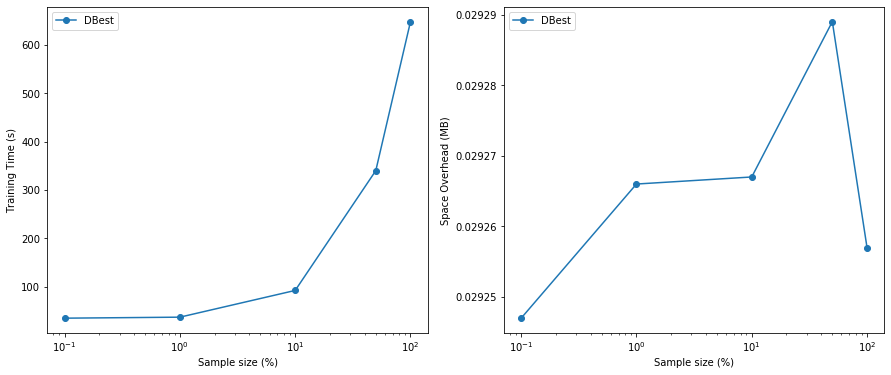

In [56]:
fig, axes = plot_overheads(training_overhead_results)
plt.show()